In [108]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [109]:
df_empresas = pd.read_pickle('Empresas.pkl')
df_itens = pd.read_pickle('Itens.pkl')

In [110]:
df = pd.merge(df_empresas,df_itens, left_on=['cnpj'], right_on=['TAXNUM'], how='inner')

In [111]:
df.head(2)

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002415828,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-14,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Elétrico de Chumbo-Ácido,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-04-10,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-26 14:31:03,2019-02-14 11:00:00,2019-02-11 11:09:47,2019-02-22 08:00:00,1900-01-01,2019-02-22 08:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 2V 1010AH C10,11428933,98010736.0,360.0,EA,Each,2019-10-30,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,X,360.0,5280.52,1900987.2,2019-02-21,16:21:27,Disqualification Over Estimated,7002415828--0001,3318098.400,-460864.800,False,False
1,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002393963,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-13,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Pb-ácido e Bateria de acumula,Brazil - Rio de Janeiro,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-03-29,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-09 13:58:30,2019-02-13 12:00:00,2019-02-05 15:32:21,2019-02-21 18:00:00,1900-01-01,2019-02-21 18:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 12V 170AH C10,11026251,98010736.0,60.0,EA,Each,2019-03-12,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,X,60.0,3081.91,184914.6,2019-02-21,14:18:08,Featured Quotation,7002393963--0001,219946.785,117062.025,False,False


In [112]:
df['UNIT_VALUE_NEW'] = df['TOTAL_VALUE'] / df['QUANTITY_y']

<AxesSubplot:>

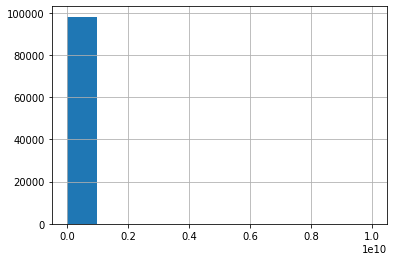

In [113]:
df['UNIT_VALUE_NEW'].hist()

<h2> Seta o target baseado em análise de amostragem das oportunidades onde: "Awarded", "Enabled" e "Homologated" são considerados ganhadores e os demais, perdedores

In [114]:
dict_target_4 = {

'Disqualification Technical Opinion': 0,
'Disqualification Excessive Price': 0,
'Disqualification Over Estimated': 0,
'Renunciation': 0,
'Declassification Proposal Invalid': 0,
'Disability - Technical qualification.': 0,
'Disability - Financial Economic Capacity.': 0,
'Did Not Present': 0,
'Disqualification Price unenforceable': 0,
'Disability - Absence of Response.': 0,
'Supplier disqualified by High GRI': 0,
'Disqualification - Breach of notice': 0,
'Desclassification - Current administrative sanctio': 0,
'Disability – Acquisit. of Rights and Contraction o': 0,
'Disqualification - Notice': 0,
'Disability - Supplier IDF below required': 0,
'Featured Quotation':0,
'Accepts':0,
'Awarded':1,
'Enabled':1,
'Homologated':1
}

df['target'] = df['CHARACTERISTIC'].replace(dict_target_4)

In [115]:
df['target'].unique()

array([0, 1, 'Price Below Market Value',
       'Disability - Repayment of Amount to Down Payment.', 'Documents',
       'Declassified', 'Excessive Price'], dtype=object)

In [116]:
df.DESCRIPTION_UC.dropna(inplace=True)

In [117]:
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR P/ PERMUTADOR - P-22535','FEIXE TUBULAR P/PERMUTADOR - P-22535'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR PARA PERMUTADOR','FEIXE TUBULAR P/PERMUTADOR'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR','FEIXE_TUBULAR'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE ','FEIXE_TUBULAR '))

In [118]:
df_token = df.copy()

df_token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98536 entries, 0 to 98535
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   cnpj                               98536 non-null  object        
 1   len                                98536 non-null  int64         
 2   cnpj_basico                        98536 non-null  int64         
 3   cnpj_dv                            98536 non-null  int64         
 4   cnpj_ordem                         98536 non-null  int64         
 5   razao_social                       98536 non-null  object        
 6   natureza_jur                       98536 non-null  object        
 7   quali_resp                         98536 non-null  object        
 8   capital_social                     98536 non-null  float64       
 9   porte                              98536 non-null  object        
 10  ente_fed_resp                    

In [119]:
df_token['MEPP_y'] = df_token['MEPP_y'].apply(lambda x: '1' if x=='X' else '0')

In [120]:
df_token.DOU_PUBL_DATE.unique()

array(['2019-02-14T00:00:00.000000000', '2019-02-13T00:00:00.000000000',
       '2019-08-12T00:00:00.000000000', ...,
       '2018-12-14T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
       '2022-05-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [121]:
#df_token.to_excel('Base_Geral_PBI.xlsx')

In [122]:
df_token['TEMPO_DURACAO'] = df_token['RECURSAL_PERIOD'] - df_token['CREATED_AT_DATE_H']
df_token['TEMPO_ABERTO'] = df_token['END_DATE_H'] - df_token['START_DATE_H']
df_token['TEMPO_RECURSO'] = df_token['RECURSAL_PERIOD'] - df_token['DIVULG_DATE_YPCON_DATE_H']

In [123]:
df_cot_dolar = pd.read_excel('Variavel_Externa_COTACAO_DOLAR.xlsx', sheet_name='Dados')
df_cot_dolar.head()

,Data,Fechamento,Variação,Variação (%),Abertura,Máxima,Mínima,Volume
0,2023-02-21,5.1680,0.00,0.0000,5.16865,5.17870,5.1655,0
1,2023-02-20,5.1680,0.00,0.0000,5.16840,5.16950,5.1664,0
2,2023-02-19,5.1679,0.00,0.0003,5.16640,5.16790,5.1664,0
3,2023-02-18,5.1664,0.00,-0.0003,5.16800,5.17138,5.1664,0
4,2023-02-17,5.1680,-0.05,-0.0096,5.21810,5.25187,5.1525,0


In [124]:
df_cot_dolar.columns

Index(['Data', 'Fechamento', 'Variação', 'Variação (%)', 'Abertura', 'Máxima', 'Mínima', 'Volume'], dtype='object')

In [125]:
df_cot_dolar.set_axis(['START_DATE', 'Fechamento_DIA', 'Variação_DIA', 'Variação_%_DIA', 'Abertura_DIA', 'Máxima_DIA', 'Mínima_DIA', 'Volume_DIA'],axis='columns', inplace=True)

In [126]:
df_cot_dolar.head(2)

,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA
0,2023-02-21,5.168,0.0,0.0,5.16865,5.1787,5.1655,0
1,2023-02-20,5.168,0.0,0.0,5.16840,5.1695,5.1664,0


In [127]:
df_cot_dolar['START_DATE'] = df_cot_dolar['START_DATE'].dt.date
df_token['START_DATE'] = df_token['START_DATE_H'].dt.date

In [128]:
df_token = pd.merge(df_token, df_cot_dolar, how='left', on=['START_DATE'])

In [129]:
df_prod_aco_cru = pd.read_excel('Variavel_Externa_PRODUCAO_ACO_CRU_BRASIL.xlsx', sheet_name='Planilha1')

In [130]:
df_prod_aco_cru.head()

,Ano,Mês,Mil_toneladas,mês_num,START_DATE
0,2013,Abr\nApr,2913.622,4,2013-04-01
1,2014,Abr\nApr,2773.487,4,2014-04-01
2,2015,Abr\nApr,2897.342,4,2015-04-01
3,2016,Abr\nApr,2321.756,4,2016-04-01
4,2017,Abr\nApr,2927.012,4,2017-04-01


In [131]:
df_prod_aco_cru.set_axis(['ANO','MES','PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES','MES_NUM','START_DATE',],axis='columns',inplace=True)
df_prod_aco_cru['START_DATE'] =  df_prod_aco_cru['START_DATE'].dt.date
df_token['START_DATE'] = pd.to_datetime(df_token['START_DATE']).dt.to_period('M').dt.to_timestamp()


In [132]:
df_token['START_DATE'] = df_token['START_DATE'].dt.date

In [133]:
df_token = pd.merge(df_token, df_prod_aco_cru[['START_DATE','PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES']], on='START_DATE', how='left')

In [134]:
df_token

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL,UNIT_VALUE_NEW,target,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,1.600000e+05,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.000000,NaN,7002415828,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-14,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Elétrico de Chumbo-Ácido,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-04-10,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-26 14:31:03,2019-02-14 11:00:00,2019-02-11 11:09:47,2019-02-22 08:00:00,1900-01-01 00:00:00,2019-02-22 08:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 2V 1010AH C10,11428933,98010736.0,360.0,EA,Each,2019-10-30,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,1,360.0,5280.52,1900987.20,2019-02-21,16:21:27,Disqualification Over Estimated,7002415828--0001,3.318098e+06,-460864.800,False,False,5.280520e+03,0,57 days 12:50:13,7 days 21:00:00,-17 days +09:28:57,2019-02-01,3.7244,-0.03,-0.0081,3.75460,3.79565,3.71510,0,2746.747
1,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,1.600000e+05,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.000000,NaN,7002393963,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-13,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Pb-ácido e Bateria de acumula,Brazil - Rio de Janeiro,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-03-29,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-09 13:58:30,2019-02-13 12:00:00,2019-02-05 15:32:21,2019-02-21 18:00:00,1900-01-01 00:00:00,2019-02-21 18:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 12V 170AH C10,11026251,98010736.0,60.0,EA,Each,2019-03-12,NaN,NaN,NaN,M-26 - Equipamentos para g

In [135]:
df_prod_petroleo = pd.read_excel('Variavel_Externa_PRODUCAO_PETROLEO_BRASIL_MM_DIA.xlsx')
df_prod_petroleo.set_axis(['START_DATE','PRODUCAO_PETROLEO_TOTAL_BRASIL_MES'],axis='columns',inplace=True)
df_prod_petroleo['START_DATE'] = df_prod_petroleo['START_DATE'].dt.date
df_prod_petroleo.head()

,START_DATE,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES
0,2018-01-01,2917.606696
1,2018-02-01,2920.919261
2,2018-03-01,2961.773617
3,2018-04-01,3435.064740
4,2018-05-01,3631.420722


In [136]:
df_token = pd.merge(df_token,df_prod_petroleo, on='START_DATE', how='left')

In [137]:
df_token.head()

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL,UNIT_VALUE_NEW,target,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002415828,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-14,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Elétrico de Chumbo-Ácido,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-04-10,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-26 14:31:03,2019-02-14 11:00:00,2019-02-11 11:09:47,2019-02-22 08:00:00,1900-01-01,2019-02-22 08:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 2V 1010AH C10,11428933,98010736.0,360.0,EA,Each,2019-10-30,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,1,360.0,5280.52,1900987.20,2019-02-21,16:21:27,Disqualification Over Estimated,7002415828--0001,3318098.400,-460864.800,False,False,5280.52,0,57 days 12:50:13,7 days 21:00:00,-17 days +09:28:57,2019-02-01,3.7244,-0.03,-0.0081,3.7546,3.79565,3.71510,0,2746.747,2785.069000
1,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002393963,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-13,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Pb-ácido e Bateria de acumula,Brazil - Rio de Janeiro,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-03-29,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-09 13:58:30,2019-02-13 12:00:00,2019-02-05 15:32:21,2019-02-21 18:00:00,1900-01-01,2019-02-21 18:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 12V 170AH C10,11026251,98010736.0,60.0,EA,Each,2019-03-12,NaN,NaN,NaN,M-26 - Equipamentos pa

In [138]:
df_demanda_auto = pd.read_excel('Variavel_Externa_AUTOMÓVEIS.xlsx')
df_demanda_auto = df_demanda_auto[['ano_mes_dia','Produção']]
df_demanda_auto.head()

,ano_mes_dia,Produção
0,2017-12-01,219697
1,2018-01-01,219217
2,2018-02-01,213498
3,2018-03-01,267539
4,2018-04-01,266549


In [139]:
df_demanda_auto.set_axis(['START_DATE', 'PRODUCAO_AUTOMOVEIS'],axis='columns',inplace=True)
df_demanda_auto['START_DATE'] = df_demanda_auto['START_DATE'].dt.date
df_demanda_auto.head()

,START_DATE,PRODUCAO_AUTOMOVEIS
0,2017-12-01,219697
1,2018-01-01,219217
2,2018-02-01,213498
3,2018-03-01,267539
4,2018-04-01,266549


In [140]:
df_token = pd.merge(df_token,df_demanda_auto, on='START_DATE', how='left')
df_token.head()

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL,UNIT_VALUE_NEW,target,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002415828,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-14,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Elétrico de Chumbo-Ácido,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-04-10,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-26 14:31:03,2019-02-14 11:00:00,2019-02-11 11:09:47,2019-02-22 08:00:00,1900-01-01,2019-02-22 08:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 2V 1010AH C10,11428933,98010736.0,360.0,EA,Each,2019-10-30,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,1,360.0,5280.52,1900987.20,2019-02-21,16:21:27,Disqualification Over Estimated,7002415828--0001,3318098.400,-460864.800,False,False,5280.52,0,57 days 12:50:13,7 days 21:00:00,-17 days +09:28:57,2019-02-01,3.7244,-0.03,-0.0081,3.7546,3.79565,3.71510,0,2746.747,2785.069000,257939
1,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002393963,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-13,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Pb-ácido e Bateria de acumula,Brazil - Rio de Janeiro,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-03-29,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-09 13:58:30,2019-02-13 12:00:00,2019-02-05 15:32:21,2019-02-21 18:00:00,1900-01-01,2019-02-21 18:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 12V 170AH C10,11026251,98010736.0,60.0,EA,Each,2019-03-12,NaN,NaN

In [141]:
df_cotacao_minerio = pd.read_excel('Variável_Externa_COTAÇÃO_MINERIO_FERRO_DOLAR.xlsx')
df_cotacao_minerio.set_axis(['START_DATE', 'COTACAO_MINERIO_FERRO_DOLAR_MES', 'VARIACAO_COTACAO_MINERIO_FERRO_MES'],axis='columns',inplace=True)
df_cotacao_minerio['START_DATE'] = df_cotacao_minerio['START_DATE'].dt.date
df_cotacao_minerio.head()

,START_DATE,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES
0,2013-03-01,"139,87",-
1,2013-04-01,"137,39","-1,77%"
2,2013-05-01,"124,01","-9,74%"
3,2013-06-01,"114,82","-7,41%"
4,2013-07-01,"127,19","10,77%"


In [142]:
from numpy import double

df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'] = df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'].apply(lambda x: x.replace(',','.'))
df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'] = df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'].astype(double)

In [143]:
#df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'] = df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'].apply(lambda x: x.replace(',','.').replace('%',''))
#df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'].astype(double)

In [144]:
df_token = pd.merge(df_token,df_cotacao_minerio, on='START_DATE', how='left')
df_token.head()

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL,UNIT_VALUE_NEW,target,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES
0,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002415828,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-14,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Elétrico de Chumbo-Ácido,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-04-10,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-26 14:31:03,2019-02-14 11:00:00,2019-02-11 11:09:47,2019-02-22 08:00:00,1900-01-01,2019-02-22 08:00:00,2019-02,8,0001,ACUMULADOR PB-ÁCIDO 2V 1010AH C10,11428933,98010736.0,360.0,EA,Each,2019-10-30,NaN,NaN,NaN,M-26 - Equipamentos para geração e distribuiçã...,- Elemento acumulador chumbo-ácido estacionário,Crítica,Dispositivo capaz de transformar energia quími...,Bens,02199488000153,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,1,360.0,5280.52,1900987.20,2019-02-21,16:21:27,Disqualification Over Estimated,7002415828--0001,3318098.400,-460864.800,False,False,5280.52,0,57 days 12:50:13,7 days 21:00:00,-17 days +09:28:57,2019-02-01,3.7244,-0.03,-0.0081,3.7546,3.79565,3.71510,0,2746.747,2785.069000,257939,88.22,"15,84%"
1,02199488000153,14,2199488,53,1,ALLTECK SISTEMAS DE ENERGIA E INFRA-ESTRUTURA ...,Sociedade Empresária Limitada,Sócio-Administrador,160000.0,Micro Empresa,NaN,1,Matriz,NaN,Ativa,20050129,SEM MOTIVO,NaN,NaN,Comércio atacadista de outras máquinas e equip...,"3313901,3321000,4321500,4530701,4665600,466990...",ESTRADA,CAPENHA,00861,NaN,PECHINCHA,22743041.0,RJ,RIO DE JANEIRO,21.0,24476114,21.0,22245636.0,21.0,24476114,COMERCIAL@ALLTECK.COM.BR,NaN,NaN,25,4.0,58.0,NaN,7002393963,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-02-13,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Acumulador Pb-ácido e Bateria de acumula,Brazil - Rio de Janeiro,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2019-03-29,2 - MODO DE DISPUTA FECHADO,ITEM,2019-04-09 13:58:30,2019-02-13 12:00:00,2019-02-05 15:32:21,2019-02-21 18:00:00,1900-01-01,2019-02-21 18:00:00,2019-02,8,0001,ACU

In [145]:
df_token.COTACAO_MINERIO_FERRO_DOLAR_MES.dtype

dtype('float64')

In [146]:
df_conf_ind_aco = pd.read_excel('Variavel_Externa_INDICE_CONFIANCA_INDUSTRIA_AÇO.xlsx',sheet_name='Situação Atual da Economia')
df_conf_ind_aco.set_axis(['START_DATE',	'IDX_CONFIANCA_SIT_ATUAL',	'IDX_EXPECTATIVAS'],axis='columns',inplace=True)
df_conf_ind_aco['START_DATE'] = df_conf_ind_aco['START_DATE'].dt.date
df_conf_ind_aco.head()

,START_DATE,IDX_CONFIANCA_SIT_ATUAL,IDX_EXPECTATIVAS
0,2019-04-01,47.6,64.7
1,2019-05-01,35.4,66.5
2,2019-06-01,32.6,61.0
3,2019-07-01,35.4,59.5
4,2019-08-01,37.3,63.4


In [147]:
df_token = pd.merge(df_token,df_conf_ind_aco, on='START_DATE', how='left')
df_token.tail()

,cnpj,len,cnpj_basico,cnpj_dv,cnpj_ordem,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,HISTORY_DYN_NAME,MESSAGES,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER_IQR_UL,OUTLIER_IQR_LL,UNIT_VALUE_NEW,target,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES,IDX_CONFIANCA_SIT_ATUAL,IDX_EXPECTATIVAS
98531,88674080000101,14,88674080,1,1,TRAMONTINA ELETRIK S.A.,Sociedade Anônima Fechada,Diretor,2.700000e+08,Demais,NaN,3,Matriz,.,Ativa,20051103,SEM MOTIVO,NaN,NaN,Fabricação de material elétrico para instalaçõ...,"2223400,2229399,2543800,2731700,2740602,275979...",RODOVIA,"RODOVIA BR-470/RS, KM 230",S/N.,NaN,TRIANGULO,95185000.0,RS,CARLOS BARBOSA,54.0,34618200,NaN,NaN,54.0,34612100,TRAMONTINA.ELT@TRAMONTINA.COM,NaN,NaN,47,9.0,58.833333,NaN,7003133491,E0005 - PATEC cancelled,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2020-06-16,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Aquisição de caixas de junção e de distribuição,Brazil - Amazonas,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2020-08-03,2 - MODO DE DISPUTA FECHADO,ITEM,2020-08-05 15:56:05,2020-06-16 10:00:00,2020-06-10 14:28:43,2020-07-06 17:00:00,1900-01-01 00:00:00,2020-07-06 18:00:00,2020-07,20,0001,CAIXA DISTR. SOBREP 251X256X120,11491572,98011276.0,16.0,EA,Each,2019-07-26,NaN,NaN,NaN,M-70 - Suprimento para Registro Local,- Caixas elétricas e acessórios,Página Amarela,"São as caixas elétricas para instalação, de us...",Bens,88674080000101,TRAMONTINA ELETRIK S.A.,0,16.0,587.87,13152.51,2020-07-06,13:08:46,Awarded,7003133491--0001,5.426378e+04,-8397.945,False,False,8.220319e+02,1,53 days 09:31:17,20 days 07:00:00,-3 days +08:03:55,2020-06-01,5.2451,0.09,0.0173,5.15633,5.25438,5.04980,0,2148.399,4106.096908,98447,103.30,"10,30%",27.2,56.8
98532,21109697001347,14,21109697,47,13,COMPANHIA DE CIMENTO CAMPEAO ALVORADA - CCA,Sociedade Anônima Fechada,Diretor,8.675113e+08,Demais,NaN,16,Filial,NaN,Ativa,20170221,SEM MOTIVO,NaN,NaN,Fabricação de cimento,"0810004,0810007,2330399,3822000,4399199,4681801",RODOVIA,RJ 166,S/N,KM 2.5,EUCLIDELANDIA,28520000.0,RJ,CANTAGALO,31.0,34198600.0,NaN,NaN,NaN,NaN,FISCAL@CIMENTONACIONAL.COM.BR,NaN,NaN,6,7.0,51.214286,NaN,7002972196,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2020-01-24,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,Historic,X,Cimento para Poço de Petróleo,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",SEM MEPP,2020-02-28,2 - MODO DE DISPUTA FECHADO,ITEM,2020-03-02 10:19:57,2020-01-27 10:00:00,2020-01-23 17:58:21,2020-02-05 18:00:00,1900-01-01 00:00:00,2020-02-05 18:00:00,2020-02,9,0001,CIMENTO POÇO PETRÓL. PORTLAND COMUM G-HS,10088961,98011615.0,39600.0,KG,Kilogram,2020-03-10

In [148]:
df_token.shape

(98536, 118)

In [149]:
df_token.drop(
[


], axis='columns', inplace=True
)

Text(0.5, 1.0, 'Valores Faltantes')

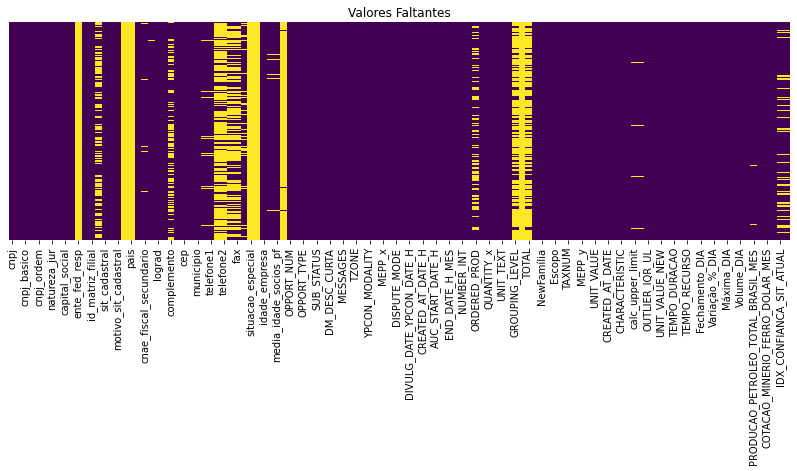

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
sns.heatmap(df_token.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [151]:
df_token.drop(df_token[df_token.UNIT_VALUE_NEW.isna()].index, inplace=True)

In [152]:
df_token['opcao_simples'] = df_token['opcao_simples'].apply(lambda x: x if x=='S' else 'N')
df_token.media_idade_socios_pf.fillna(df_token.media_idade_socios_pf.mean(),inplace=True)
df_token.quantidade_socios_grupo.fillna(df_token.quantidade_socios_grupo.mean(),inplace=True)
df_token.IDX_CONFIANCA_SIT_ATUAL.fillna(df_token.IDX_CONFIANCA_SIT_ATUAL.mean(),inplace=True)
df_token.IDX_EXPECTATIVAS.fillna(df_token.IDX_EXPECTATIVAS.mean(),inplace=True)
df_token.PRODUCAO_PETROLEO_TOTAL_BRASIL_MES.fillna(df_token.PRODUCAO_PETROLEO_TOTAL_BRASIL_MES.mean(),inplace=True)

Text(0.5, 1.0, 'Valores Faltantes')

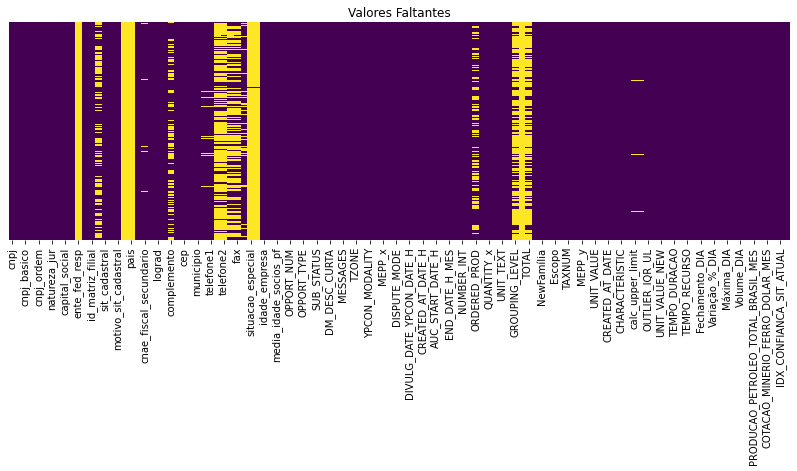

In [153]:
plt.figure(figsize=(14,4))
sns.heatmap(df_token.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [154]:
#df_token.to_excel('Dataset Final.xlsx')
df_token.to_pickle('Dataset.pkl')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98536 entries, 0 to 98535
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   cnpj                               98536 non-null  object        
 1   len                                98536 non-null  int64         
 2   cnpj_basico                        98536 non-null  int64         
 3   cnpj_dv                            98536 non-null  int64         
 4   cnpj_ordem                         98536 non-null  int64         
 5   razao_social                       98536 non-null  object        
 6   natureza_jur                       98536 non-null  object        
 7   quali_resp                         98536 non-null  object        
 8   capital_social                     98536 non-null  float64       
 9   porte                              98536 non-null  object        
 10  ente_fed_resp                    